# Sentiment Analysis through VADER, TextBlob & Machine Learning Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('Airline-Sentiment-2-w-AA.csv',encoding='latin-1')
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [3]:
data.shape

(14640, 20)

In [13]:
import nltk
from wordcloud import WordCloud
from string import punctuation
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [14]:
from nltk.tokenize import TweetTokenizer
from autocorrect import Speller
tweet_tok=  TweetTokenizer()
spell=Speller(lang='en')
stop_nltk= stopwords.words("english")
stop_updated= stop_nltk+['user']+['https://t.co.']+[' http://t.co/']+['...'] +['http co']
lemm = WordNetLemmatizer()

def clean_text(text):
    tokens= tweet_tok.tokenize(text.lower())
    stemmed=[lemm.lemmatize(term) for term in tokens if term not in  stop_updated and term not in list(punctuation) and len(term)>2]
    stemmed_tok = [word for word in stemmed if word.isalpha()]
    stemmed_tokens = [spell(word) for word in stemmed_tok]
    res=' '.join(stemmed_tokens)
    return res

In [15]:
data['Clean_Tweets']= data['text'].apply(clean_text)

In [17]:
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('#','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('@','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('http','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('co','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('_ùª _ùª ','')
data['Clean_Tweets']=data['Clean_Tweets'].str.replace('â_ù â_ù','')

### Sentiment Analysis using VADER Lexicon

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser= SentimentIntensityAnalyzer() 

In [30]:
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [31]:
data['sent_vader']= data['Clean_Tweets'].apply(get_vader_sentiment)

In [32]:
sent_pred=[]
for i in range(len(data['sent_vader'])):
    if data['sent_vader'][i]>=0.05:
        sent_pred.append('positive')
    elif data['sent_vader'][i]<=-0.05:
        sent_pred.append('negative')
    else:
        sent_pred.append('neutral')  

In [33]:
data['sent_pred']= sent_pred

In [34]:
data.head()

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,Clean_Tweets,sent_vader,sent_pred
0,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,NaN,Eastern Time (US & Canada),said,0.0000,neutral
1,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,NaN,Pacific Time (US & Canada),plus added mmercial experience tacky,0.0000,neutral
2,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,Lets Play,Central Time (US & Canada),today must mean need take another trip,0.0000,neutral
3,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...,-0.3306,negative
4,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,NaN,Pacific Time (US & Canada),really big bad thing,-0.5829,negative


In [35]:
from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder()  #Creating a label-encoder obj
data['flagged_sentiment']= x1.fit_transform(data['airline_sentiment'])
data['predicted_sentiment']= x1.fit_transform(data['sent_pred']) 
data.head()

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,...,text,tweet_coord,tweet_created,tweet_location,user_timezone,Clean_Tweets,sent_vader,sent_pred,flagged_sentiment,predicted_sentiment
0,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,...,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,NaN,Eastern Time (US & Canada),said,0.0000,neutral,1,1
1,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,...,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,NaN,Pacific Time (US & Canada),plus added mmercial experience tacky,0.0000,neutral,2,1
2,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,...,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,Lets Play,Central Time (US & Canada),today must mean need take another trip,0.0000,neutral,1,1
3,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,...,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...,-0.3306,negative,0,0
4,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,...,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,NaN,Pacific Time (US & Canada),really big bad thing,-0.5829,negative,0,0


In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(data['flagged_sentiment'],data['predicted_sentiment'])

0.4956967213114754

In [37]:
confusion_matrix(data['flagged_sentiment'],data['predicted_sentiment'])

array([[3874, 2230, 3074],
       [ 406, 1393, 1300],
       [  89,  284, 1990]], dtype=int64)

#### Accuracy of VADER lexicon is 49.56% 

### Sentiment Analysis with TextBlob

In [9]:
from textblob import TextBlob
def get_textblob_sentiment(sent):
    return TextBlob(sent).sentiment.polarity


In [10]:
data['sent_TextBlob']= data['Clean_Tweets'].apply(get_textblob_sentiment)

In [14]:
sent_pred=[]
for i in range(len(data['sent_TextBlob'])):
    if data['sent_TextBlob'][i]>=0.05:
        sent_pred.append('positive')
    elif data['sent_TextBlob'][i]<=-0.05:
        sent_pred.append('negative')
    else:
        sent_pred.append('neutral')  

In [15]:
data['sent_pred']= sent_pred

In [16]:
from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder()  #Creating a label-encoder obj
data['flagged_sentiment']= x1.fit_transform(data['airline_sentiment'])
data['predicted_sentiment']= x1.fit_transform(data['sent_pred']) 
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,...,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone,Clean_Tweets,sent_TextBlob,sent_pred,flagged_sentiment,predicted_sentiment
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,...,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada),said,0.00000,neutral,1,1
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada),plus added mmercial experience tacky,0.00000,neutral,2,1
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada),today must mean need take another trip,-0.31250,negative,1,0
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...,0.00625,neutral,0,1
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada),really big bad thing,-0.35000,negative,0,0


In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(data['flagged_sentiment'],data['predicted_sentiment'])

0.42916666666666664

In [18]:
confusion_matrix(data['flagged_sentiment'],data['predicted_sentiment'])

array([[2666, 4042, 2470],
       [ 249, 1922,  928],
       [  84,  584, 1695]], dtype=int64)

#### Accuracy using TextBlob is 42.91%

### Sentiment Analysis with using Models

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

In [39]:
X= data['Clean_Tweets'].values
y= data['flagged_sentiment'].values

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [41]:
count_vect= CountVectorizer()
x_train_bow= count_vect.fit_transform(X_train)

In [42]:
x_test_bow= count_vect.transform(X_test)

In [43]:
print(x_train_bow.shape,x_test_bow.shape)

(10248, 6791) (4392, 6791)


### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

LogReg= LogisticRegression()
LogReg= LogReg.fit(x_train_bow,y_train)

y_pred= LogReg.predict(x_test_bow)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [45]:
LRA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ", LRA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score:  0.7873406193078324
Confusion Matrix: 
[[2535  200   79]
 [ 348  462   74]
 [ 143   90  461]]


In [46]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
LogReg= multiclass_roc_auc_score(y_test,y_pred)
LogReg

0.775424530222006

### Naive Bayes Classification

In [48]:
from sklearn.naive_bayes import  MultinomialNB

mnb= MultinomialNB()
mnb=mnb.fit(x_train_bow.toarray(),y_train)

y_pred= mnb.predict(x_test_bow.toarray())

In [49]:
NBA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",NBA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score:  0.76775956284153
Confusion Matrix: 
[[2624  128   62]
 [ 496  327   61]
 [ 203   70  421]]


In [50]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
NB= multiclass_roc_auc_score(y_test,y_pred)
NB

0.729391463354013

### KNN

In [52]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_bow.toarray(),y_train)

y_pred= knn.predict(x_test_bow.toarray())

In [53]:
KNNA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",KNNA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score:  0.5311930783242259
Confusion Matrix: 
[[1297 1389  128]
 [ 154  669   61]
 [  83  244  367]]


In [54]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
KNN= multiclass_roc_auc_score(y_test,y_pred)
KNN

0.6799515463402511

### Decision Tree

In [56]:
dtc= DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train_bow.toarray(),y_train)
y_pred= dtc.predict(x_test_bow.toarray())

In [57]:
DTA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",DTA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score:  0.6910291438979964
Confusion Matrix: 
[[2170  459  185]
 [ 300  461  123]
 [ 160  130  404]]


In [58]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
DT= multiclass_roc_auc_score(y_test,y_pred)
DT

0.7220119359148245

### Random Forest

In [60]:
rf= RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(x_train_bow.toarray(),y_train)
y_pred= rf.predict(x_test_bow.toarray())

In [61]:
RFA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",RFA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score:  0.7609289617486339
Confusion Matrix: 
[[2476  240   98]
 [ 362  429   93]
 [ 178   79  437]]


In [62]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
RF= multiclass_roc_auc_score(y_test,y_pred)
RF

0.7516789214082253

### Ada Boost Classifier

In [64]:
ada= AdaBoostClassifier(n_estimators=100,random_state=0)
ada.fit(x_train_bow.toarray(),y_train)
y_pred= ada.predict(x_test_bow.toarray())

In [65]:
ADAA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",ADAA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score:  0.7165300546448088
Confusion Matrix: 
[[2303  410  101]
 [ 371  434   79]
 [ 184  100  410]]


In [66]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
AD= multiclass_roc_auc_score(y_test,y_pred)
AD

0.7257280523893445

### Gradient Boost Algorithm

In [68]:
gradient= GradientBoostingClassifier(n_estimators=200,random_state=0,max_depth=2)
gradient.fit(x_train_bow.toarray(),y_train)
y_pred= gradient.predict(x_test_bow.toarray())

In [69]:
GBA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",GBA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score:  0.7199453551912568
Confusion Matrix: 
[[2698   30   86]
 [ 739   81   64]
 [ 298   13  383]]


In [70]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
GB= multiclass_roc_auc_score(y_test,y_pred)
GB

0.6487164288090904

### XG Boost Algorithm

In [72]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
Xg= GradientBoostingClassifier(n_estimators=200,random_state=0,max_depth=2)
Xg.fit(x_train_bow.toarray(),y_train)
y_pred= Xg.predict(x_test_bow.toarray())

In [73]:
XGA= metrics.accuracy_score(y_pred,y_test)
print("Accuracy Score: ",XGA)
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Accuracy Score:  0.7199453551912568
Confusion Matrix: 
[[2698   30   86]
 [ 739   81   64]
 [ 298   13  383]]


In [74]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
XG= multiclass_roc_auc_score(y_test,y_pred)
XG

0.6487164288090904

### Comparison Of ML Models

In [76]:
Algorithms= ['Logistic Regression','Naive Bayes','KNN','Decision Tree','Random Forest','Ada Boost','Gradient Boost','XG Boost']
Accuracy= [LRA,NBA,KNNA,DTA,RFA,ADAA,GBA,XGA]
AUC_ROC= [LogReg,NB,KNN,DT,RF,AD,GB,XG]
comp= pd.DataFrame([Accuracy,AUC_ROC]).T
comp.set_index([Algorithms],inplace=True)
comp.columns=['Accuracy','AUC-ROC']
comp

,Accuracy,AUC-ROC
Logistic Regression,0.787341,0.775425
Naive Bayes,0.767760,0.729391
KNN,0.531193,0.679952
Decision Tree,0.691029,0.722012
Random Forest,0.760929,0.751679
Ada Boost,0.716530,0.725728
Gradient Boost,0.719945,0.648716
XG Boost,0.719945,0.648716


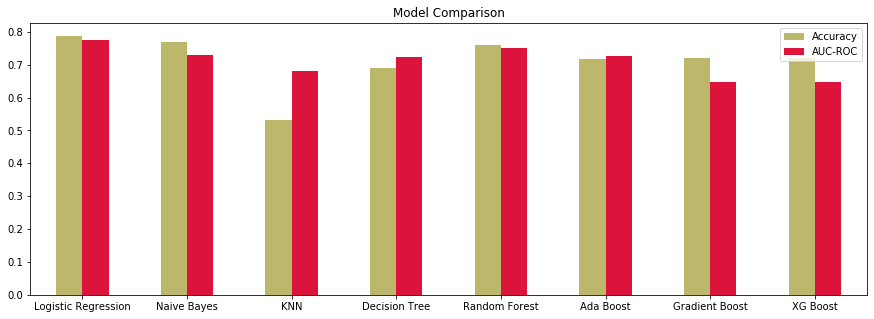

In [77]:
comp.plot(kind='bar',figsize=(15,5),rot=0,title='Model Comparison',color=['darkkhaki','crimson'])